In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
dataset.shape

(1460, 81)

### Check out Missing Value

In [6]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
dataset_dropna = dataset.dropna(axis=1, thresh=dataset.shape[0]*9/10)
dataset_dropna.shape

(1460, 75)

In [8]:
index = []
for col in dataset.columns.values:
    if col not in dataset_dropna.columns.values:
        index.append(col)
index

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
test_dropna = test.drop(columns=index)
test_dropna.shape

(1459, 74)

Categorical :

In [10]:
for col in ('Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'):
    dataset_dropna[col]=dataset_dropna[col].fillna('None')
    test_dropna[col] = test_dropna[col].fillna('None')

/home/mma/anaconda3/envs/math_for_ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
for col in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    dataset_dropna[col]=dataset_dropna[col].fillna(dataset_dropna[col].mode()[0])
    test_dropna[col]=test_dropna[col].fillna(test_dropna[col].mode()[0])

/home/mma/anaconda3/envs/math_for_ml/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Numerical :

In [12]:
for col in ('MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    dataset_dropna[col]=dataset_dropna[col].fillna(0)
    test_dropna[col] = test_dropna[col].fillna(0)

/home/mma/anaconda3/envs/math_for_ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
dataset_dropna.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [14]:
test_dropna.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

### Data Visualization

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

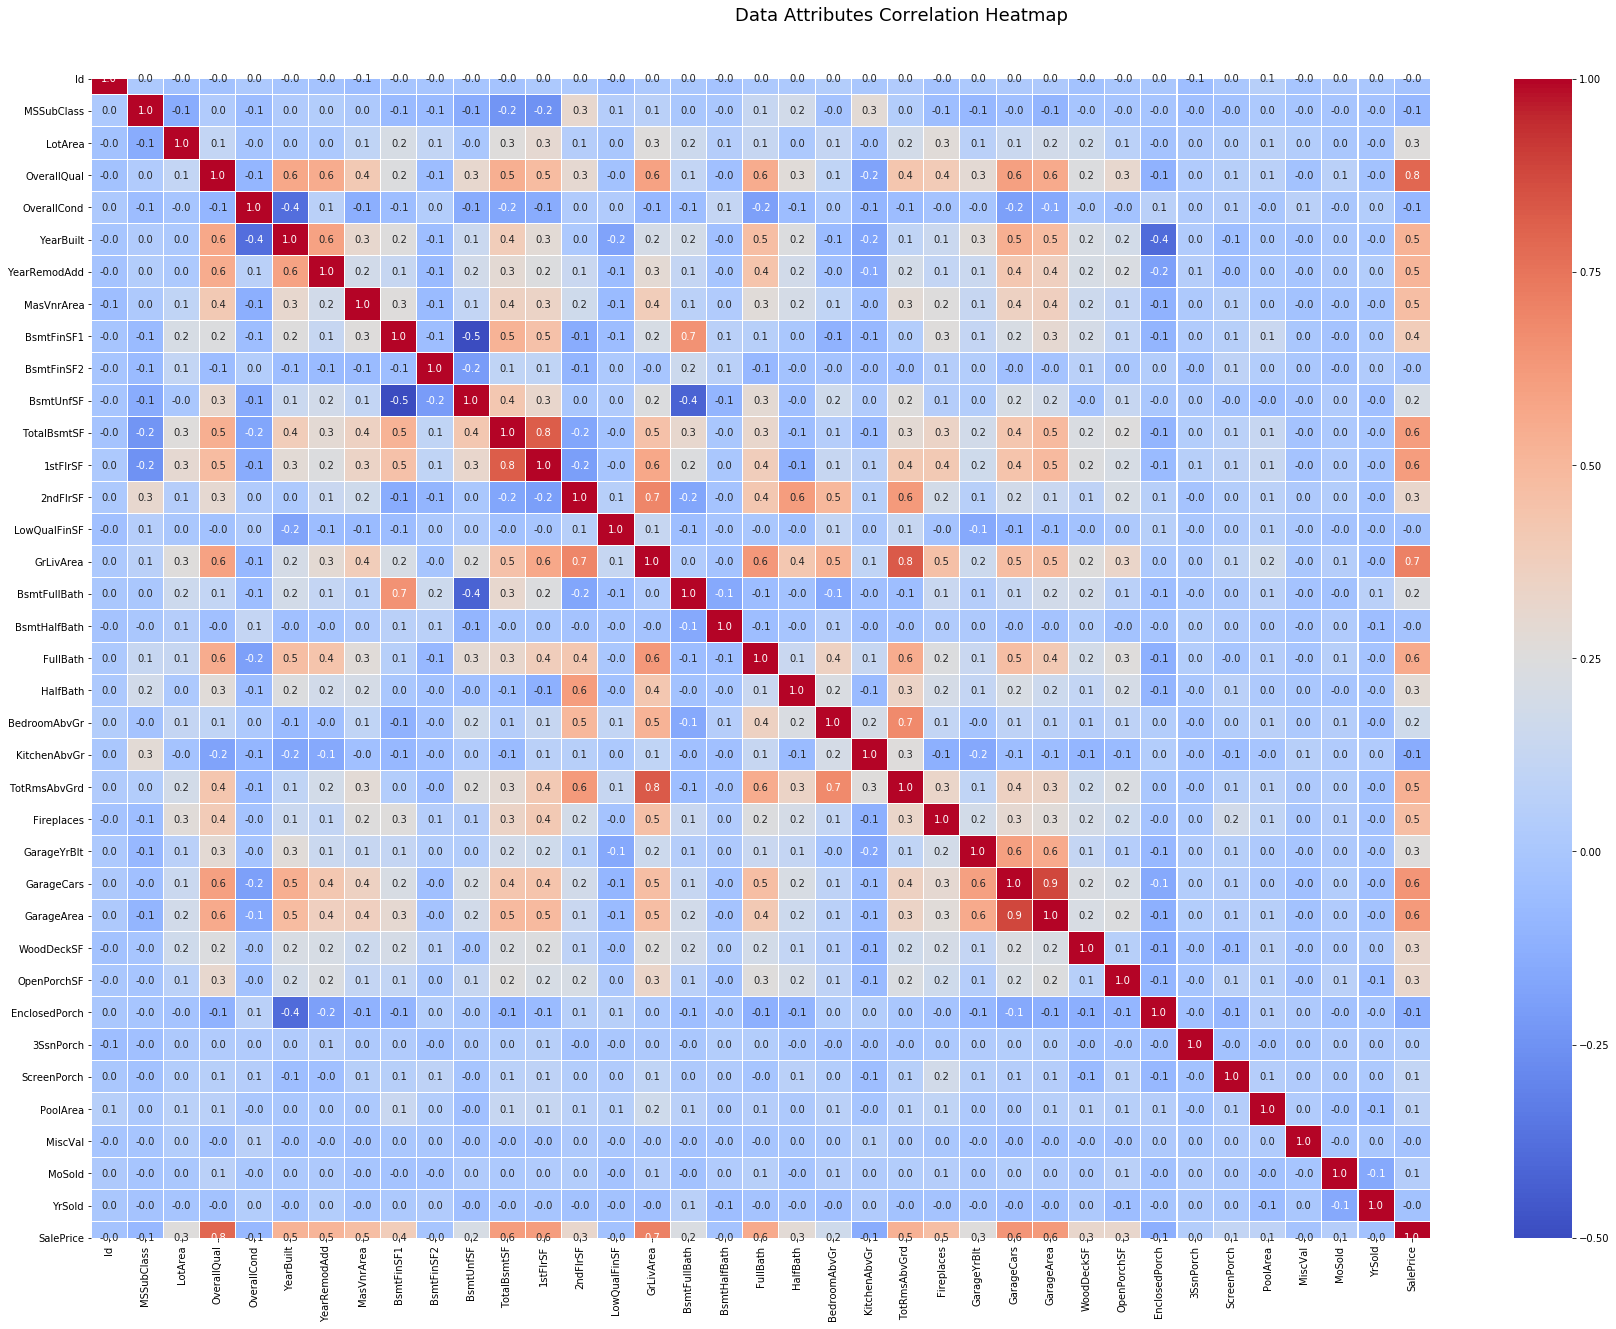

In [16]:
f, ax = plt.subplots(figsize=(30, 20))
corr = dataset_dropna.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.1f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Data Attributes Correlation Heatmap', fontsize=18)

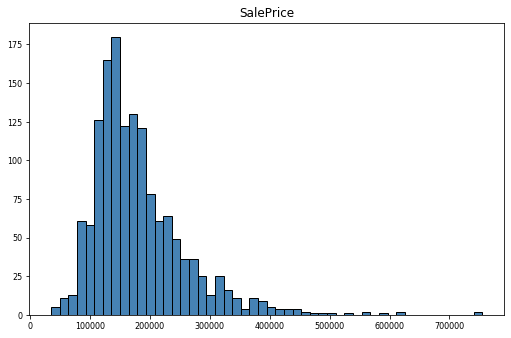

In [21]:
dataset_dropna[['SalePrice']].hist(bins=50, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

### Feature Selection

Drop some columns high correlated with other and it's correlated column be high correlated with target

In [22]:
dataset_dropna_columns = dataset_dropna.drop(columns=['Id', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BedroomAbvGr' ,
                                                     'TotRmsAbvGrd', 'GarageCars', ])
dataset_dropna_columns.shape

(1460, 68)

In [23]:
test_dropna_columns = test_dropna.drop(columns=['Id', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BedroomAbvGr' ,
                                                     'TotRmsAbvGrd', 'GarageCars', ])
test_dropna_columns.shape

(1459, 67)

### Remove Outliers

In [24]:
dataset_dropna_columns = dataset_dropna_columns[dataset_dropna_columns['GrLivArea']<4000]
dataset_dropna_columns.shape

(1456, 68)

### Data Transformation

In [25]:
from scipy.stats import skew
from scipy.special import boxcox1p

In [26]:
len_train = dataset_dropna_columns.shape[0]
houses = pd.concat([dataset_dropna_columns,test_dropna_columns], sort=False)

Numerical to categorical

In [27]:
houses['MSSubClass']=houses['MSSubClass'].astype(str)

Skew

In [28]:
skew=houses.select_dtypes(include=['int','float']).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skew_df=pd.DataFrame({'Skew':skew})
skewed_df=skew_df[(skew_df['Skew']>0.5)|(skew_df['Skew']<-0.5)]

In [29]:
skewed_df.index

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'SalePrice',
       'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces', 'HalfBath',
       'TotalBsmtSF', 'OverallCond', 'YearBuilt', 'GarageYrBlt'],
      dtype='object')

In [30]:
dataset_train = houses[:len_train]
dataset_test = houses[len_train:]

In [31]:
lam=0.1
for col in ('MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'GrLivArea', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces',
       'HalfBath', 'TotalBsmtSF', 'OverallCond', 'YearBuilt',
       'GarageYrBlt'):
    dataset_train[col] = boxcox1p(dataset_train[col],lam)
    dataset_test[col] = boxcox1p(dataset_test[col],lam)

/home/mma/anaconda3/envs/math_for_ml/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mma/anaconda3/envs/math_for_ml/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [32]:
dataset_train['SalePrice']=np.log(dataset_train['SalePrice'])

/home/mma/anaconda3/envs/math_for_ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Categorical Data to One-Hot Encoding

In [33]:
houses=pd.concat([dataset_train, dataset_test], sort=False)
houses=pd.get_dummies(houses)

In [34]:
dataset_train=houses[:len_train]
dataset_test=houses[len_train:]
dataset_train

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,14.699651,7,1.962312,11.388965,2003,6.960811,9.272672,0.000000,6.515727,9.647083,...,0,0,0,1,0,0,0,0,1,0
1,15.016794,6,2.457309,11.359971,1976,0.000000,9.910321,0.000000,7.598858,10.423978,...,0,0,0,1,0,0,0,0,1,0
2,15.416697,7,1.962312,11.386830,2002,6.642507,8.567477,0.000000,8.358996,9.789096,...,0,0,0,1,0,0,0,0,1,0
3,15.003735,7,1.962312,11.293132,1970,0.000000,7.125607,0.000000,8.763754,9.404819,...,0,0,0,1,1,0,0,0,0,0
4,16.026454,8,1.962312,11.385761,2000,7.969281,9.128917,0.000000,8.582671,10.226394,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,14.539265,6,1.962312,11.384692,2000,0.000000,0.000000,0.000000,9.858884,9.858884,...,0,0,0,1,0,0,0,0,1,0
1456,15.821315,6,2.148140,11.362131,1988,6.140542,9.490261,6.652690,8.927149,10.837067,...,0,0,0,1,0,0,0,0,1,0
1457,14.867450,7,2.589254,11.321852,2006,0.000000,7.542477,0.000000,9.694704,10.238715,...,0,0,0,1,0,0,0,0,1,0
1458,15.047114,5,2.148140,11.331713,1996,0.000000,4.787576,10.011688,0.000000,10.104911,...,0,0,0,1,0,0,0,0,1,0


### Data Visualization

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

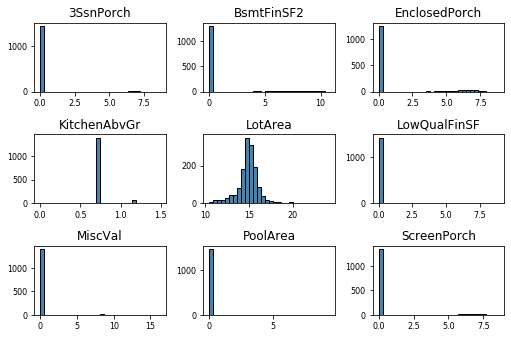

In [42]:
dataset_train[['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',]].hist(
    bins=30, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

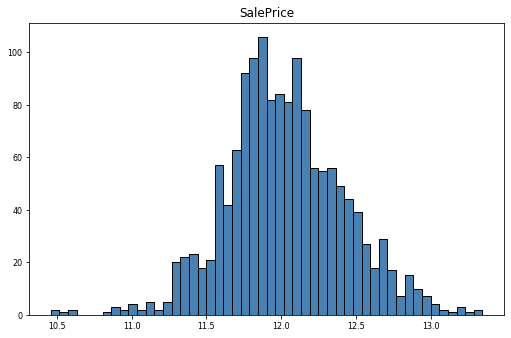

In [38]:
dataset_train[['SalePrice']].hist(bins=50, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

### Data Splitting

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
dataset_y = dataset_train['SalePrice']
dataset_X = dataset_train.drop(columns=['SalePrice'])
dataset_X.columns


Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=288)

### Data Scaling

In [33]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [34]:
dataset_test.drop(columns=['SalePrice'], inplace=True)

/home/mma/anaconda3/envs/math_for_ml/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
sc = RobustScaler()
dataset_X = sc.fit_transform(dataset_X)
dataset_test = sc.transform(dataset_test)
dataset_X = pd.DataFrame(dataset_X)
dataset_X

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,-0.263533,0.5,0.000000,0.670695,0.255034,1.045917,0.124074,0.000000,-0.856285,-0.296764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.032144,0.0,2.663733,0.087072,-0.469799,0.000000,0.192830,0.000000,-0.396932,0.502344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.404979,0.5,0.000000,0.627707,0.228188,0.998090,0.048034,0.000000,-0.074560,-0.150690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.019969,0.5,0.000000,-1.258356,-0.630872,0.000000,-0.107440,0.000000,0.097097,-0.545956,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,0.973464,1.0,0.000000,0.606199,0.174497,1.197448,0.108573,0.000000,0.020300,0.299110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,-0.413063,0.0,0.000000,0.584681,0.174497,0.000000,-0.875780,0.000000,0.561538,-0.078907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1452,0.782210,0.0,1.000000,0.130549,-0.147651,0.922665,0.147536,6.652690,0.166392,0.927244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1453,-0.107091,0.5,3.373768,-0.680247,0.335570,0.000000,-0.062490,0.000000,0.491910,0.311784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1454,0.060412,-0.5,1.000000,-0.481755,0.067114,0.000000,-0.359545,10.011688,-3.619586,0.174154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y , 
                                                    test_size = 0.1, random_state = 26)
X_train.reset_index(inplace=True, drop = True)
y_train.reset_index(drop=True, inplace=True)
X_train

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,-1.472200,0.0,1.000000,0.087072,-0.469799,0.00000,0.188403,0.000000,-3.619586,-0.068227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.543047,1.5,0.000000,0.756555,0.362416,0.00000,-0.875780,0.000000,1.114076,1.261200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.272593,1.0,0.000000,0.756555,0.389262,1.18648,0.252709,0.000000,-0.105537,1.143563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.369803,0.0,0.000000,0.649206,0.228188,0.00000,-0.875780,0.000000,0.610555,0.039976,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.940418,-0.5,1.000000,-0.503769,-1.167785,0.00000,-0.056410,0.000000,0.325557,0.021613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.377456,0.0,1.000000,0.260742,-0.255034,0.00000,0.110140,0.000000,0.142958,0.451902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,-0.141158,0.0,1.000000,-0.284086,-0.926174,0.00000,0.108573,0.000000,-3.619586,-0.829746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,0.517539,0.5,0.000000,0.692175,0.308725,0.00000,-0.875780,0.000000,0.462922,-0.318088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308,1.904598,0.5,1.878787,-0.087231,0.255034,0.00000,-0.047927,5.271613,0.759854,0.963088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Fitting Model

In [37]:
from sklearn.linear_model import Lasso, LassoCV

In [38]:
regressor = Lasso(alpha =0.001, random_state=1)

In [39]:
regressor.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

### Evaluation

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import math
y_pred = regressor.predict(X_test)

In [41]:
r2_score(y_test, y_pred)

0.9109971098351873

In [42]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_pred))

0.009202859901259984

In [43]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,-1.472200,0.0,1.000000,0.087072,-0.469799,0.00000,0.188403,0.000000,-3.619586,-0.068227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.543047,1.5,0.000000,0.756555,0.362416,0.00000,-0.875780,0.000000,1.114076,1.261200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.272593,1.0,0.000000,0.756555,0.389262,1.18648,0.252709,0.000000,-0.105537,1.143563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.369803,0.0,0.000000,0.649206,0.228188,0.00000,-0.875780,0.000000,0.610555,0.039976,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.940418,-0.5,1.000000,-0.503769,-1.167785,0.00000,-0.056410,0.000000,0.325557,0.021613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0.377456,0.0,1.000000,0.260742,-0.255034,0.00000,0.110140,0.000000,0.142958,0.451902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,-0.141158,0.0,1.000000,-0.284086,-0.926174,0.00000,0.108573,0.000000,-3.619586,-0.829746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,0.517539,0.5,0.000000,0.692175,0.308725,0.00000,-0.875780,0.000000,0.462922,-0.318088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1308,1.904598,0.5,1.878787,-0.087231,0.255034,0.00000,-0.047927,5.271613,0.759854,0.963088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plot Results

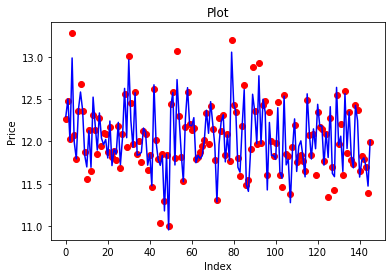

In [44]:
X_grid = []
for i in range(len(y_test)):
    X_grid.append(i)
  
# reshape for reshaping the data into  
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
# X_grid = X_grid.reshape((len(X_grid), 1))  
  
# scatter plot for original data 
plt.scatter(X_grid, y_test, color = 'red') 
  
# plot predicted data 
plt.plot(X_grid, y_pred, color = 'blue')  
  
# specify title 
plt.title('Plot')  
  
# specify X axis label 
plt.xlabel('Index') 
  
# specify Y axis label 
plt.ylabel('Price') 
  
# show the plot 
plt.show() 

### Submission

In [45]:
test = pd.read_csv('data/test.csv')

In [46]:
dataset_test = pd.DataFrame(dataset_test)
dataset_test

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,0.482186,-0.5,1.000000,-0.240270,-0.872483,0.000000,0.040508,6.448898,-0.434432,-0.236275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.974655,0.0,1.000000,-0.306009,-0.953020,0.899460,0.180453,0.000000,-0.126190,0.611213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.899288,-0.5,0.000000,0.541616,0.120805,0.000000,0.147801,0.000000,-0.919059,-0.133078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.122383,0.0,1.000000,0.563153,0.120805,0.534741,0.091269,0.000000,-0.298261,-0.137469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.438351,1.0,0.000000,0.433782,-0.040268,0.000000,-0.070879,0.000000,0.616402,0.532094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.417825,-1.0,1.878787,-0.043596,-0.630872,0.000000,-0.875780,0.000000,0.105879,-1.184051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,-3.461343,-1.0,0.000000,-0.043596,-0.630872,0.000000,-0.078877,0.000000,-0.371148,-1.184051,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
1456,1.808270,-0.5,1.878787,-0.262173,0.067114,0.000000,0.241499,0.000000,-3.619586,0.438265,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
1457,0.228813,-0.5,0.000000,0.433782,-0.040268,0.000000,-0.023767,0.000000,0.147139,-0.168441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
y_prediction = regressor.predict(dataset_test)
y_prediction = np.exp(y_prediction)
y_prediction

array([126695.85442843, 151704.99843474, 186917.25586736, ...,
       173772.80502118, 119262.53825836, 230048.11050704])

In [50]:
output=pd.DataFrame({'Id':test.Id, 'SalePrice':y_prediction})
output.to_csv('submission.csv', index=False)